<a href="https://colab.research.google.com/github/abhijeet-sarkar-01/autism_detection/blob/main/SVM_linearKernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[get_dataset_dir] Dataset found in /root/nilearn_data/ABIDE_pcp

SVM Classification Report: 

Accuracy  : 0.7143
Precision : 0.7200
Recall    : 0.8571
F1 Score  : 0.7826


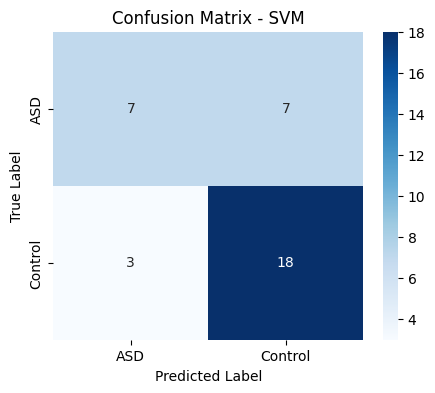

In [18]:
# Installing nilearn (only needed in notebook/first time)
!pip install nilearn

# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nilearn.datasets import fetch_abide_pcp
from nilearn.connectome import ConnectivityMeasure, sym_matrix_to_vec

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 2. Load ABIDE NYU Data
data = fetch_abide_pcp(derivatives=['rois_aal'], SITE_ID=['NYU'])

# 3. Compute Functional Connectivity Matrices
conn_est = ConnectivityMeasure(kind='correlation')
conn_matrices = conn_est.fit_transform(data['rois_aal'])  # shape: (subjects, 116, 116)

# 4. Flatten symmetric matrices into feature vectors
X = sym_matrix_to_vec(conn_matrices)  # shape: (n_subjects, 6786)

# 5. Extract labels
y = data.phenotypic['DX_GROUP'].values  # 1 = ASD, 2 = Control

# Convert labels from (1,2) → (0,1)
y = np.array([0 if label == 1 else 1 for label in y])

# 6. Feature Scaling
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train SVM Classifier
svm = SVC(kernel='linear', C=1, gamma='scale')  # You can also try 'linear' or 'poly' kernels
svm.fit(X_train, y_train)

# 9. Make Predictions
y_pred = svm.predict(X_test)

# 10. Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("SVM Classification Report:", "\n")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["ASD", "Control"], yticklabels=["ASD", "Control"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()
